In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
from sklearn import svm
from scipy.stats import multivariate_normal


# you can choose one of the following package for image reading/processing

import cv2
import PIL

# 1. **Support vector machine**

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework3/x_train.csv",header= None)/255 #normalize
label = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework3/t_train.csv",header= None)

## **1a. PCA implement**

In [5]:
A = np.array(data)
A_mean = np.mean(A,axis=0) #Calculate the mean (shape 784,1)
Cov = np.cov(A.transpose())
eigen_value, eigen_vec = np.linalg.eig(Cov)
eigen_copy = eigen_value
sorted_eigen = -np.sort(-eigen_value)
max_eigen1 = sorted_eigen[0]
max_eigen2 = sorted_eigen[1]

for i in range (300):
  if max_eigen1 == eigen_copy[i]:
    col_index1 = i
  if max_eigen2 == eigen_copy[i]:
    col_index2 = i
# print(Cov.shape)
W = np.zeros((len(eigen_value),2))
W[:,0] = eigen_vec[:,col_index1]
W[:,1] = eigen_vec[:,col_index2]

new_data = np.dot(W.transpose(),A.transpose())
new_data = new_data.transpose()
print("The new dimension of data is ", new_data.shape)
print("         ")
print("         ")






The new dimension of data is  (300, 2)
         
         


<ipython-input-5-0d6a6dcc685a>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  W[:,0] = eigen_vec[:,col_index1]
<ipython-input-5-0d6a6dcc685a>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  W[:,1] = eigen_vec[:,col_index2]


## **1b. The differences between OvA and OvO**
For One vs All: each class will be classified between itself and the rest. Therefore, we have to prepare and train N difference targets dataset and models. 

One vs One: We will classify the pair of the class, and normally, this approach is more expensive compared to OvA. The number of model for this method is N*(N-1)/2

For this homework, I choose OvA because it's more easy to interpret the idea. The predict result of each sample can be taken from the maximum values from N different classes. 

## **Below is the diagram of OvA method**

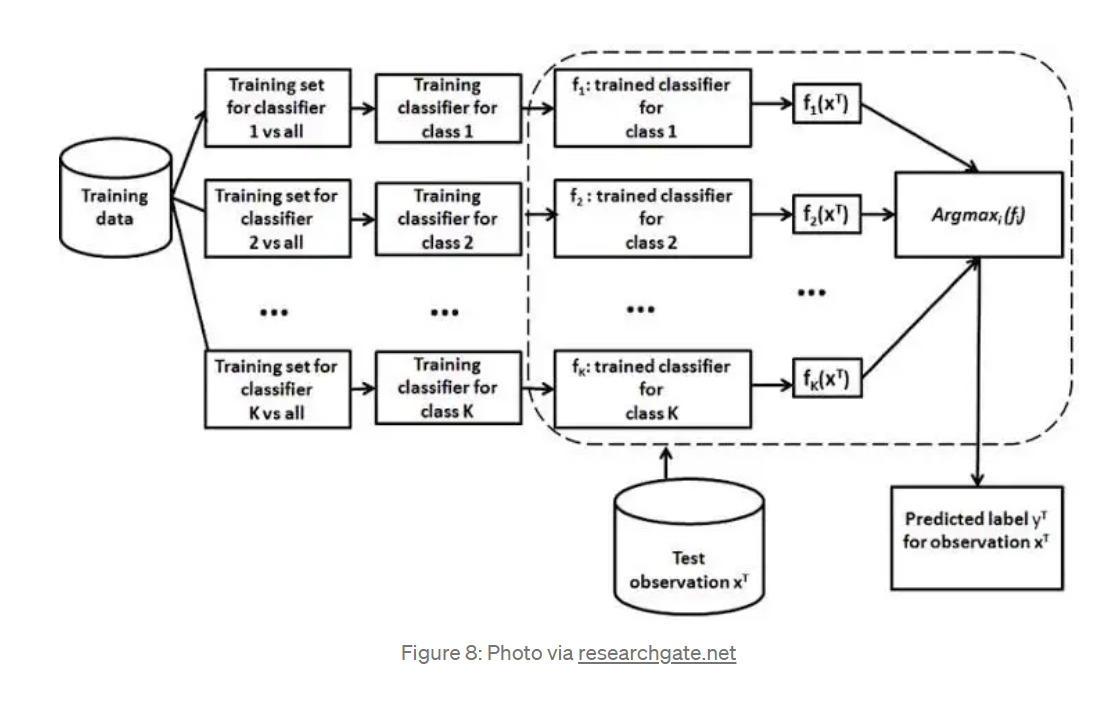

## **1c. SVM algorithm**

## All functions

In [ ]:
def model_target(target, model): 
  # will return target for each model
  target = np.array(target)
  target_arr = -np.ones(len(target))
  for i in range (len(target)):
    if target[i] == model:
      target_arr[i] = 1
  
  return target_arr

def kernel(Xi,X):
  return np.dot(Xi,X.transpose())

def cal_w_b(an, label,X,support_index,support_vector1):
  N = an.shape[0]
  w = np.zeros((N,2))
  for i in range(N):
    w[i,:] = an[i]*label[i]*X[support_index[i]]

  w = np.reshape(w.sum(axis=0),(-1,1))

  #####
  #b
  index = np.where((an>0)) and (( an<1  ))
  index = np.where(index==True)
  M_vector = support_vector1[index[0],:]
  M_target = label[index]
  print(index[0])
  sum_n = 0
  for n in range(M_vector.shape[0]):
    sum_s = 0
    Xi = M_vector[[n],:] #the value of M_vector
    for m in range(len(an)):
      
      sum_s += an[m]*label[m]*kernel(Xi,support_vector1[m,:])
  
    sum_n += M_target[n] - sum_s
  N_m = M_vector.shape[0]
  b = (1/N_m)*sum_n
  return w, b

def cal_b(an, label,X,support_index,support_vector1):
  index = np.where((an>0)) and (( an<1  ))
  index = np.where(index==True)
  M_vector = support_vector1[index[0],:]
  M_target = label[index]
  print(index[0])
  sum_n = 0
  for n in range(M_vector.shape[0]):
    sum_s = 0
    Xi = M_vector[[n],:] #the value of M_vector
    for m in range(len(an)):
      
      sum_s += an[m]*label[m]*kernel(Xi,support_vector1[m,:])
  
    sum_n += M_target[n] - sum_s
  N_m = M_vector.shape[0]
  b = (1/N_m)*sum_n
  
  return b

def cal_acc(X,w,b,target):
  N = X.shape[0]
  correct = 0
  for i in range(N):
    y = (w.T @ X[i,:]) + b
    if np.sign(y) == target[i]:
      correct +=1
  
  return correct*100/N

def predict(X,w1,b1,w2,b2,w3,b3):
  N = X.shape[0]
  result = np.zeros(N)
  correct = 0
  for i in range(N):
    result1 = (w1.T @ X[i,:]) + b1
    result2 = (w2.T @ X[i,:]) + b2
    result3 = (w3.T @ X[i,:]) + b3
    result[i] = np.argmax([result1,result2,result3])
    # if result[i] == target[i]:
    #   correct +=1 
  # print(correct*100/N)
  return result
  

[22 23 64]
88.33333333333333


In [ ]:
temp_data = np.copy(np.array(new_data))
target = np.array(label)
target = target.ravel()
# print(target_model0.shape)
# print(temp_data.shape)

 

target_model1 = model_target(target,0)
target_model2 = model_target(target,1)
target_model3 = model_target(target,2)

model1 = svm.SVC(kernel="linear")
model1.fit (temp_data,target_model1)

model2 = svm.SVC(kernel="linear")
model2.fit (temp_data,target_model2)

model3 = svm.SVC(kernel="linear")
model3.fit (temp_data,target_model3)
 
alphas1 = np.abs(model1.dual_coef_)
label1 = np.sign(model1.dual_coef_)
support_vector1 = model1.support_vectors_
support_index1 = model1.support_

alphas2 = np.abs(model2.dual_coef_)
label2 = np.sign(model2.dual_coef_)
support_vector2 = model2.support_vectors_
support_index2 = model2.support_

alphas3 = np.abs(model3.dual_coef_)
label3 = np.sign(model3.dual_coef_)
support_vector3 = model3.support_vectors_
support_index3 = model3.support_
# support_index3


# model.dual_coef_[0:support_indices[0]].shape
print(model1.coef_.shape)
count = 0

(1, 2)


In [ ]:
target_model1

array([-1.])

## Calculate the result

In [ ]:
X = np.copy(temp_data)


a_temp1 = alphas1.transpose()
a_temp2 = alphas2.transpose()
a_temp3 = alphas3.transpose()

# a_model1 = alphas1.transpose()
# a_model2 = alphas2.transpose()
# a_model3 = alphas3.transpose()
b_model1=0
b_model2=0
b_model3=0
M1 = len(a_temp1)
M2 = len(a_temp2)
M3 = len(a_temp3)
_label1 = label1.transpose()
_label2 = label2.transpose()
_label3 = label3.transpose()


C1 = 0.5
C2 = 1
C3 = 0.5
epoch = 200
best_accurate1 = 0
best_accurate2 = 0
best_accurate3 = 0
accurate1 = 0
accurate2 = 0
accurate3 = 0

w1,b1 = cal_w_b(a_temp1, _label1,X,support_index1,support_vector1)
b1 = cal_b(a_temp1,_label1, X,support_index1, support_vector1)
X_vector1 = X[support_index1]
acc1 = cal_acc(X,w1,b1,target_model1)

 

w2,b2 = cal_w_b(a_temp2, _label2,X,support_index2,support_vector2)
acc2 = cal_acc(X,w2,b2,target_model2)
 

w3,b3 = cal_w_b(a_temp3, _label3,X,support_index3,support_vector3)
acc3 = cal_acc(X,w3,b3,target_model3)
 

result = predict(X,w1,b1,w2,b2,w3,b3)
  

[22 23 64]
[22 23 64]
[ 0  7 16]
[1 4 8]


(3,)

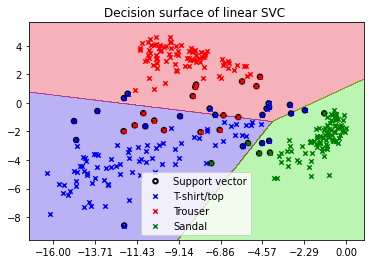

In [ ]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy




model = svm.SVC(kernel="linear")
model.fit (temp_data,target)
support_vector = model.support_vectors_

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, clf, xx, yy, )
# Z = predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = predict( np.c_[xx.ravel(), yy.ravel()],w1,b1,w2,b2,w3,b3)
Z = Z.reshape(xx.shape)
out = ax.contourf(xx, yy, Z, cmap=plt.cm.brg, alpha=0.3)
ax.scatter(support_vector[:,0], support_vector[:,1], facecolors= 'None', cmap=plt.cm.coolwarm, s=20, edgecolors='k',linewidth=2,label="Support vector",marker='o')
colors = ['b','r','g']
classes =['T-shirt/top', 'Trouser', 'Sandal']
i = 0
for color, label in zip(colors,classes):
  index = np.where(target==i )
  ax.scatter(X0[index], X1[index], c=color, cmap=plt.cm.coolwarm, s=20, edgecolors='none',label=label,marker='x')
  i += 1
# ax.scatter(X0, X1, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='none',label="T-shirt/top")
# ax.set_ylabel('y label here')
# ax.set_xlabel('x label here')
# ax.set_xticks((np.linspace(int(np.min(X0)),int(X0.max()),num=7)))
ax.set_xticks((np.linspace(int(np.min(X0)),int(X0.max()),num=8)))
ax.set_yticks((np.linspace(int(np.min(X1)),int(X1.max()),num=7)))
ax.set_title(title)
ax.legend(loc='best')
plt.show()

# **2. Gaussian Mixture Model**
## 2.1 K-mean

In [2]:
# function

def re_shape(img, shape):
  image = np.zeros((shape[0],shape[1],shape[2]))  
  count = 0
  
  for row in range (shape[0]):
    for dim in range (shape[2]):
      for col in range (shape [1]):
        image[row][col][dim] = img[count]
        # print (row)
        count += 1

  print (image.shape)
  return image

def cal_u(r_nk,samples):
  K = r_nk.shape[1]
  N = samples.shape[0]
  u = np.zeros((K,3))
  
  for channel in range(3):
    for k in range(K): # number of k
      # channel = 0
      r_x = 0
      sum_r_nk = 0 
      for n in range(N):
        r_x += r_nk[n][k]*samples[n][channel]
        sum_r_nk += r_nk[n][k]
      if sum_r_nk==0:
        return u, sum_r_nk,k
      u[k][channel] = r_x/sum_r_nk
      # print("sum_r_nk",sum_r_nk)
  
  return u,sum_r_nk,k


def find_argmin(xn, u):
  K = u.shape[0]
  distance_arr = np.zeros((K))
  for j in range (K):
    distance_arr[j] = ((xn[0]-u[j,0])**2+(xn[1]-u[j,1])**2+(xn[2]-u[j,2])**2)**0.5
  min_index = np.argmin(distance_arr)
  # print(min_index)
  return min_index

def cal_r_nk(samples, u): #re-checkkkkk
  N = samples.shape[0]
  K = u.shape[0]
  r_nk = np.zeros((N,K))
  # channel = 0
  
  for n in range (N):
    for k in range (K):
      min_index = find_argmin(samples[n,:],u)
      # print (min_index, " ", k)
      if k == min_index:
        r_nk [n][k] = 1

  
  return r_nk

def find_J(r,u,samples):
  N = samples.shape[0]
  K = u.shape[0]
  error = 0
  channel = 0

  for channel in range(3):
    for n in range (N):
      for k in range (K):
        error += r[channel][n][k]*(samples[n][channel]-u[channel][0][k])**2
  return error

from prettytable import PrettyTable

def table(centers, k):
  table = PrettyTable()
  table.title = f'K-means k = {k}'
  col = ['Cluster', 'R', 'G', 'B']
  table.field_names = col
  for i in range(k):
    rows = [i]
    for color in (np.array(centers[i])*255).astype(int):
      rows.append(color)
    table.add_row(rows)
  print(table)

def reconstruct(r_nk):
  # a = np.reshape(r_nk, shape)

  reconstruct = []
  cluster = {}
  for i in range(k):
    cluster[i] = []

  # for channel in range(3):
  for n in range (N):
    index = np.argmax(r_nk[n,:])
    cluster[index].append(samples[n][:])
    if (n==1):
      print(type(samples[n][:]))

  mean = {}
  for i in range(k):
    mean[i] = []
    mean[i].append(np.mean(cluster[i], axis=0))

  # mean = mean.values()
  # mean = list(mean)
  # mean = mean.item()

  for n in range (N):
    index = np.argmax(r_nk[n,:])
    reconstruct.append(mean[index])
  # for channel in range(3):
  #   for n in range (N):
  #     index = np.argmax(r_nk[channel,n,:])
  #     reconstruct[n][channel] = np.array(mean[index])
      # if (n==1):
      #   print(type(samples[n][:]))

  # reconstruct = reconstruct.T
  # reconstruct = np.array(reconstruct).astype(int).reshape(shape)
  # print(np.array(reconstruct).shape)


  reconstruct = np.array(reconstruct).reshape(shape)
  reconstruct = (reconstruct*255.0).astype(int)
  cv2_imshow(reconstruct)

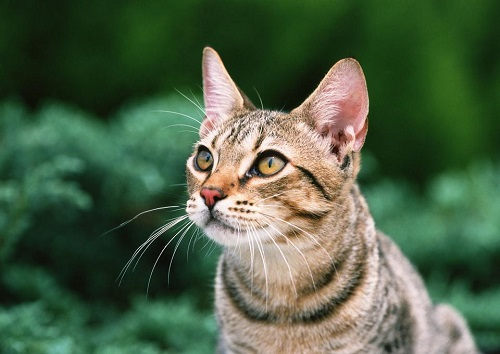

In [3]:
# parameter setup
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Homework3/hw3.jpg")
image = image
cv2_imshow(image)
shape = image.shape
samples = np.reshape(image,(shape[0]*shape[1], shape[2]))/255
 #(354, 500, 3)

In [ ]:
samples[0,:][0]

+---------------------------+
|       K-means k = 2       |
+---------+-----+-----+-----+
| Cluster |  R  |  G  |  B  |
+---------+-----+-----+-----+
|    0    | 142 | 162 | 168 |
|    1    |  34 |  65 |  33 |
+---------+-----+-----+-----+
<class 'numpy.ndarray'>


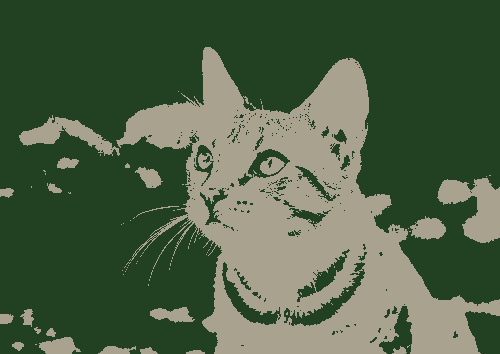

+---------------------------+
|       K-means k = 3       |
+---------+-----+-----+-----+
| Cluster |  R  |  G  |  B  |
+---------+-----+-----+-----+
|    0    |  63 |  98 |  55 |
|    1    | 148 | 166 | 178 |
|    2    |  18 |  45 |  20 |
+---------+-----+-----+-----+
<class 'numpy.ndarray'>


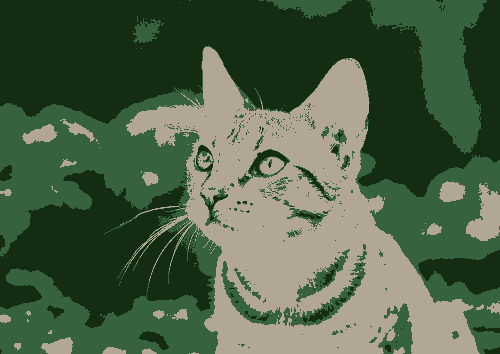

+---------------------------+
|       K-means k = 7       |
+---------+-----+-----+-----+
| Cluster |  R  |  G  |  B  |
+---------+-----+-----+-----+
|    0    |  19 |  55 |  23 |
|    1    |  68 |  98 |  50 |
|    2    |  84 | 108 | 118 |
|    3    |  32 |  76 |  35 |
|    4    | 164 | 178 | 202 |
|    5    | 106 | 138 |  87 |
|    6    |  15 |  33 |  16 |
+---------+-----+-----+-----+
<class 'numpy.ndarray'>


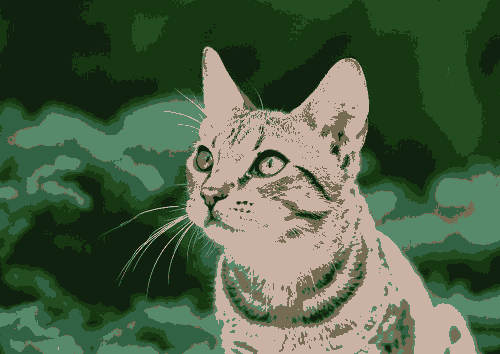

+---------------------------+
|       K-means k = 20      |
+---------+-----+-----+-----+
| Cluster |  R  |  G  |  B  |
+---------+-----+-----+-----+
|    0    | 117 | 146 | 100 |
|    1    |  17 |  63 |  24 |
|    2    |  16 |  48 |  20 |
|    3    | 155 | 169 | 193 |
|    4    | 140 | 149 | 150 |
|    5    |  51 |  81 |  43 |
|    6    |  26 |  52 |  24 |
|    7    |  27 |  76 |  33 |
|    8    |  20 |  41 |  18 |
|    9    | 192 | 202 | 225 |
|    10   | 218 | 226 | 244 |
|    11   | 172 | 185 | 208 |
|    12   |  97 | 131 |  76 |
|    13   | 130 | 152 | 184 |
|    14   |  10 |  20 |  13 |
|    15   |  74 | 103 |  61 |
|    16   |  14 |  38 |  16 |
|    17   |  11 |  30 |  16 |
|    18   |  94 | 120 | 152 |
|    19   |  18 |  30 |  16 |
+---------+-----+-----+-----+
<class 'numpy.ndarray'>


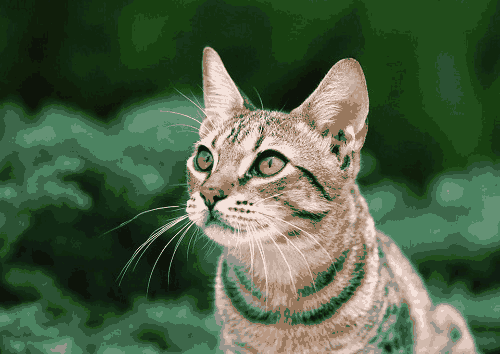

In [10]:

# a = np.reshape(samples, shape)
N = shape[0]*shape[1]
K = [2,3,7,20]
N = len(samples) # number of samples
for k in (K):
  u_k = np.zeros((k,3)) # 3 is number of channel
  # print(u_k.shape)

  for i in range(k):
    temp = int(np.random.randint(N,size=1)+1)
    u_k[i][0] = samples[temp][0]
    u_k[i][1] = samples[temp][1]
    u_k[i][2] = samples[temp][2]

    # u_k[0][0][i] = 0
    # u_k[1][0][i] = 0
    # u_k[2][0][i] = 0

  u_k = np.array(u_k) #(5, 1)
  # print (u_k.shape)
  epoch = 3
  error = []
  condition = True
  while condition:


    incorrect = []
    correct = []
    flag = 1
    for j in range(epoch):
      r_nk = cal_r_nk(samples,u_k)
      u_k, sum_r_nk, i= cal_u(r_nk,samples)
      # err = find_J(r_nk,u_k,samples)
      # error.append(err)
      if sum_r_nk == 0:
        flag = 0
        incorrect.append(i)
      
        # break
      if (j== epoch-1) and flag==1 : condition = False
    correct.append(i)
    if condition == True:
      for i in incorrect:
        temp = int(np.random.randint(N,size=1)+1)
        u_k[i][0] = samples[temp-1][0]
        u_k[i][1] = samples[temp-1][1]
        u_k[i][2] = samples[temp-1][2]

  table(u_k,k)
  reconstruct(r_nk)


# print(r_nk.shape)
# print(u_k.shape)
# cv2_imshow(a)

# **2.4 Discussion**
1. For the K-mean, we will find the r_nk, which show that each sample belongs to each centroid. The value of r_nk is 0, 1, for example if r_nk[0][1] = 1, it means that the sample 0 belong to k=1.
2. For GMM, we will find z_nk, the difference is that it will calculate the probability that each sample belong to which Gaussian. For example z_nk[0][3] has the largest probability compared to others, it means that the sample 0 belongs to the 4th Gaussian.


# **2.2 EM algorithm**


# All function

In [9]:
def cal_distance(x,mu):
  temp = []
  for i in range(len(mu)):
    distance = (x-mu[i])**2
    temp.append(distance)
  
  temp = np.array(temp)
  return np.argmin(temp)

def return_Ck(Ck):
  n = len(Ck) -1

  while True:
    if Ck[n] != 0:
      break
    else: n = n - 1
  
  return Ck[0:n+1]

def gaussian(xn, u, sigma):
  det_cov = np.linalg.det(sigma)
  inv_cov = np.linalg.pinv(sigma)

  a = (1/np.sqrt(det_cov*2*np.pi))*np.exp(-1/2*((xn-u).T @ inv_cov @(xn -u)))
  return np.float64(a)


I apply the Gaussian formula as below equation.

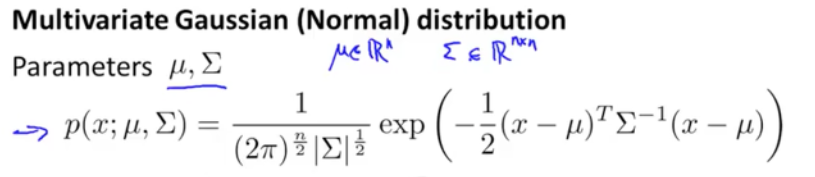

The parameter's initialization is based on the below algorithm.

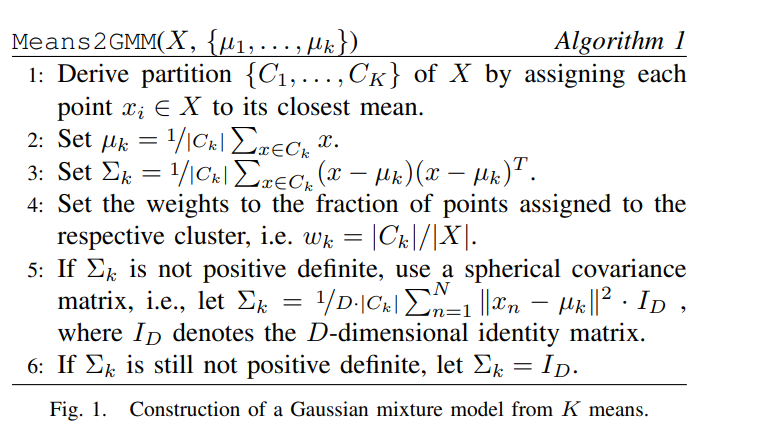

## **Initialize parameters**

In [19]:
mu = np.copy(u_k) ## should copy, otherwise, it changes the value of u_k when modifying mu
C_partition = {}
for i in range(k):
  C_partition[i] = []
shape = image.shape
N = shape[0]*shape[1]
X_ = image.reshape(shape[0]*shape[1],shape[2])
k = mu.shape[0]
# mu
mu_k = mu
# C_partition = np.zeros((k+1,len(X_)))

count = np.zeros((1,k+1))
for i in range(len(X_)):
  index = np.argmax(r_nk[i,:])
  C_partition[index].append(X_[i,:])
  # count[0][index] += 1



sigma = np.zeros((k,3,3))
sigma[:] = np.identity(3)
# for i in range(k):
#   for n in range(len(C_partition[i])):
#     a = np.reshape((C_partition[i][n]-mu_k[i]),(3,1))
#     sigma[i,:,:] +=  a @ a.T
#   sigma = sigma/np.linalg.norm(C_partition[i],axis=0)
  

pi = np.zeros(k)
for i in range(k):
  pi[i] = len(C_partition[i])/N



  


In [57]:
pi.shape

(2,)

# EM algorithm

In [ ]:
# mu_k = mu
epoch = 3
N = shape[0]*shape[1]
z_nk = np.zeros((N,k))
X_ = np.reshape(image,(shape[0]*shape[1],3))
for h in range(epoch):
  print(h)

  # E-step
 
  # channel = 0
  for n in range(N):
    sum_gaus = 0 ## buggggg
    for j in range(k):
      sum_gaus += pi[j]*multivariate_normal.pdf(X_[n],mu_k[j,:],sigma[j,:,:])

    for k_index in range(k):
      z_nk[n][k_index] = pi[k_index]*multivariate_normal.pdf(X_[n],mu_k[k_index,:],sigma[k_index,:,:])/sum_gaus

  ## M-step

  # Update mu_k, sigma and pi
  Nk = np.zeros((k))
  for i in range (k):
    Nk[i] = z_nk[:,i].sum(axis=0)

 
  for i in range(len(mu_k)):
      # mu_k[i] = np.dot(r_nk[:,i],(X_))/Nk[i]
      for channel in range(3):
        mu_k[i,:] = np.dot(z_nk[:,i],(X_[:,channel]))/Nk[i]
        sigma[i,:,:] = 1/Nk[i] * np.dot(z_nk[:,i],(X_[:,channel].reshape((shape[0]*shape[1],1)) - mu_k[i,:]) @(X_[:,channel].reshape((shape[0]*shape[1],1)) - mu_k[i,:]).T )
        pi[i] = Nk[i]/(N)








In [ ]:
multivariate_normal.pdf(X_[0],mu_k[0,:],sigma[0,:,:])

(177000, 3)


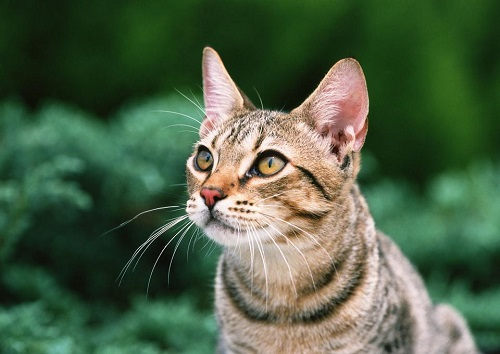

In [ ]:
# a = np.concatenate((image[:,:,0],image[:,:,1],image[:,:,2]),axis=0)
# rebuild = np.zeros((shape))
# rebuild[0:shape[0],:,0] = a[0:shape[0],:]
# rebuild[0:shape[0],:,1] = a[shape[0]:2*shape[0],:]
# rebuild[0:shape[0],:,2] =  a[2*shape[0]:3*shape[0],:]
# reconstruct = a.reshape(shape)
b = np.reshape(image,(shape[0]*shape[1],shape[2]))
c = np.reshape(b,(shape))
print(b.shape)
cv2_imshow(c)
# print(a.shape)

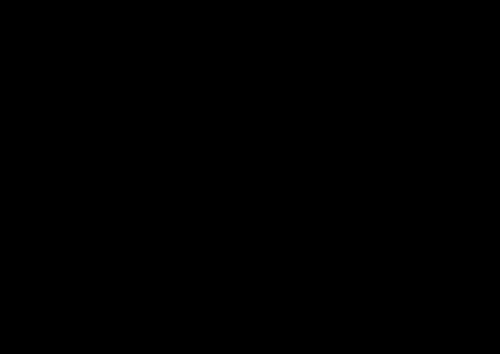

In [ ]:
reconstruct = np.zeros(len(X_))
for i in range(len(X_)):
  # print(index)
  index = np.argmax(r_nk[i,:])
  reconstruct[i] = mu_k[index]
  

reconstruct = reconstruct.reshape(shape)

cv2_imshow(reconstruct)

